In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('player data PL.csv')
df.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Playing Time,Playing Time.1,Playing Time.2,...,Per 90 Minutes.4,Expected,Expected.1,Expected.2,Per 90 Minutes.5,Per 90 Minutes.6,Per 90 Minutes.7,Per 90 Minutes.8,Per 90 Minutes.9,Unnamed: 30
0,Rk,Player,Nation,Pos,Squad,Age,Born,MP,Starts,Min,...,G+A-PK,xG,npxG,xA,xG,xA,xG+xA,npxG,npxG+xA,Matches
1,1,Patrick van Aanholt\Patrick-van-Aanholt,nl NED,DF,Crystal Palace,30-152,1990,10,9,829,...,0.11,0.7,0.7,0.7,0.08,0.08,0.16,0.08,0.16,Matches
2,2,Tammy Abraham\Tammy-Abraham,eng ENG,FW,Chelsea,23-118,1997,17,9,912,...,0.69,5.5,5.5,0.9,0.54,0.09,0.63,0.54,0.63,Matches
3,3,Che Adams\Che-Adams,eng ENG,FW,Southampton,24-199,1996,18,18,1507,...,0.48,3.8,3.8,4.0,0.23,0.24,0.47,0.23,0.47,Matches
4,4,Tosin Adarabioyo\Tosin-Adarabioyo,eng ENG,DF,Fulham,23-126,1997,15,15,1350,...,0.00,0.6,0.6,0.1,0.04,0.01,0.05,0.04,0.05,Matches


In [3]:
new_header = df.iloc[0] #grab the first row for the header
df = df[1:] #take the data less the header row
df.columns = new_header
df.head()

,Rk,Player,Nation,Pos,Squad,Age,Born,MP,Starts,Min,...,G+A-PK,xG,npxG,xA,xG,xA,xG+xA,npxG,npxG+xA,Matches
1,1,Patrick van Aanholt\Patrick-van-Aanholt,nl NED,DF,Crystal Palace,30-152,1990,10,9,829,...,0.11,0.7,0.7,0.7,0.08,0.08,0.16,0.08,0.16,Matches
2,2,Tammy Abraham\Tammy-Abraham,eng ENG,FW,Chelsea,23-118,1997,17,9,912,...,0.69,5.5,5.5,0.9,0.54,0.09,0.63,0.54,0.63,Matches
3,3,Che Adams\Che-Adams,eng ENG,FW,Southampton,24-199,1996,18,18,1507,...,0.48,3.8,3.8,4.0,0.23,0.24,0.47,0.23,0.47,Matches
4,4,Tosin Adarabioyo\Tosin-Adarabioyo,eng ENG,DF,Fulham,23-126,1997,15,15,1350,...,0.00,0.6,0.6,0.1,0.04,0.01,0.05,0.04,0.05,Matches
5,5,Adrián\Adrian,es ESP,GK,Liverpool,34-025,1987,2,2,180,...,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,Matches


In [4]:
# only need team and age 
df = df[['Squad', 'Age']]
df = df.sort_values(by = ['Squad'])
df.head()

,Squad,Age
310,Arsenal,21-049
404,Arsenal,29-150
401,Arsenal,20-184
379,Arsenal,19-145
52,Arsenal,25-315


In [5]:
# df['Age'] = df['Age'].str.split('-')[0]
df['Age'] = df['Age'].astype(str)
df['Age'] = df.apply(lambda x: x.Age.split('-')[0], axis = 1)
print(df['Age'].isna().sum())
df['Age'] = df['Age'].astype(float)
df.head()

0


,Squad,Age
310,Arsenal,21.0
404,Arsenal,29.0
401,Arsenal,20.0
379,Arsenal,19.0
52,Arsenal,25.0


In [6]:
df.Squad.unique()

array(['Arsenal', 'Aston Villa', 'Brighton', 'Burnley', 'Chelsea',
       'Crystal Palace', 'Everton', 'Fulham', 'Leeds United',
       'Leicester City', 'Liverpool', 'Manchester City', 'Manchester Utd',
       'Newcastle Utd', 'Sheffield Utd', 'Southampton', 'Tottenham',
       'West Brom', 'West Ham', 'Wolves'], dtype=object)

In [7]:
# teams = ['Crystal Palace', 'Chelsea', 'Southampton', 'Fulham', 'Liverpool',
#        'Manchester City', 'Wolves', 'West Brom', 'Leicester City',
#        'Tottenham', 'Leeds United', 'Everton', 'Newcastle Utd',
#        'Brighton', 'Sheffield Utd', 'West Ham', 'Arsenal',
#        'Manchester Utd', 'Burnley', 'Aston Villa']
# teams.sort()

In [8]:
sns.set_theme(style="dark", rc={"axes.facecolor": (0, 0, 0, 0)})



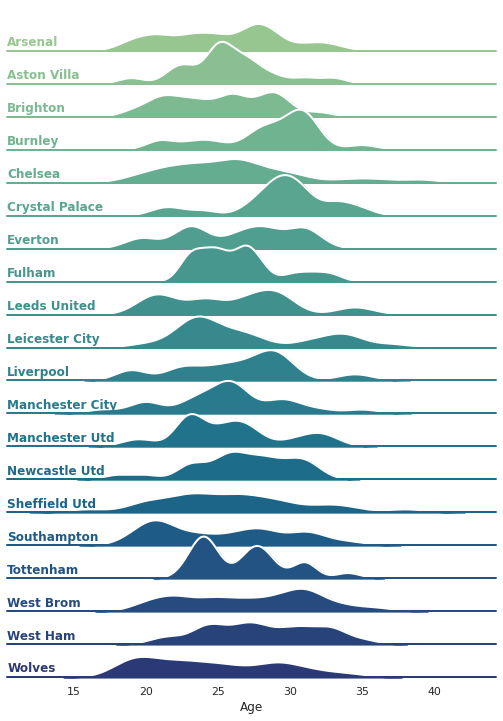

In [9]:
# Initialize the FacetGrid object
# pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
pal = sns.color_palette("crest", n_colors=20)
g = sns.FacetGrid(df, row="Squad", hue="Squad", aspect=15, height=.5, palette=pal)

g.map(sns.kdeplot, "Age",
      bw_adjust=.5, clip_on=False,
      fill=True, alpha=1, linewidth=1.5)
g.map(sns.kdeplot, "Age", clip_on=False, color="w", lw=2, bw_adjust=.5)
g.map(plt.axhline, y=0, lw=2, clip_on=False)


def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)


g.map(label, "Age")

g.fig.subplots_adjust(hspace=-.25)

g.set_titles("")
g.set(yticks=[])
g.despine(bottom=True, left=True)

In [99]:
g.savefig('PL age.png')